In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [27]:
tweets_corpus = pd.read_csv("AnnotatedTweetsWithVaderSentiment.csv", index_col=0)
tweets_corpus

,text,polarity,favourite_count,retweet_count,created_at,compound,neg,neu,pos,sentiment
1,Another class show tonight Unsure on Charlene...,positive,5,0,2022-02-12 23:57:06+00:00,0.9287,0.039,0.620,0.341,Positive
2,The county needs more people like Tommy and Br...,positive,6,0,2022-02-12 23:55:45+00:00,0.4173,0.000,0.783,0.217,Positive
3,What age are ya????\nHave you ever been examin...,positive,1,0,2022-02-12 23:47:26+00:00,0.7236,0.000,0.760,0.240,Positive
4,Tommy was almost as good as Croker earlier Goo...,positive,1,0,2022-02-12 23:46:54+00:00,0.3862,0.000,0.774,0.226,Positive
5,Brush Shields walks out and I say to my self ...,neutral,2,0,2022-02-12 23:46:12+00:00,0.2732,0.000,0.928,0.072,Positive
...,...,...,...,...,...,...,...,...,...,...
1460,It's a jam packed Late Late Show in store for ...,positive,1,0,2022-02-24 12:30:00+00:00,0.0000,0.000,1.000,0.000,Neutral
1461,Friday night's show will be jam-packed with gu...,positive,2,0,2022-02-24 12:00:01+00:00,0.3818,0.000,0.923,0.077,Positive
1462,Comedian Patrick Kielty leads lineup for this ...,positive,0,0,2022-02-24 10:47:10+00:00,0.3818,0.000,0.776,0.224,Positive
1463,Will you be tuning in? ://t.co/2Tz1QscEhl,neutral,2,0,2022-02-24 09:46:08+00:00,0.0000,0.000,1.000,0.000,Neutral


# Pie chart of annotated tweets

<AxesSubplot:title={'center':'Pie Chart - % of polarity from annotated tweets'}, ylabel='polarity'>

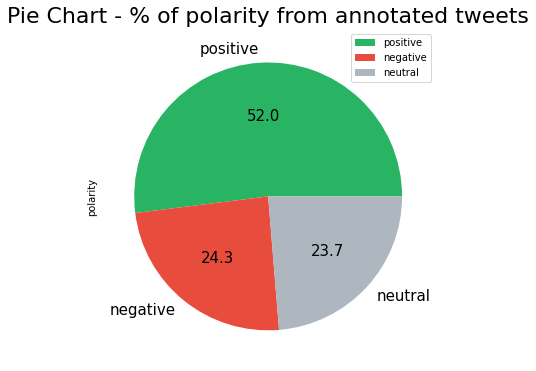

In [28]:
#%matplotlib inline
colors = ['#28B463', '#E74C3C', '#AEB6BF']
plt.title("Pie Chart - % of polarity from annotated tweets", fontsize = 22)
tweets_corpus['polarity'].value_counts().plot(kind='pie', autopct='%.1f', 
                                  figsize = [6,9], colors=colors, fontsize=15, legend=True)


# Pie chart of Vader Sentiment

<AxesSubplot:title={'center':'Pie Chart - % of polarity from Vader'}, ylabel='sentiment'>

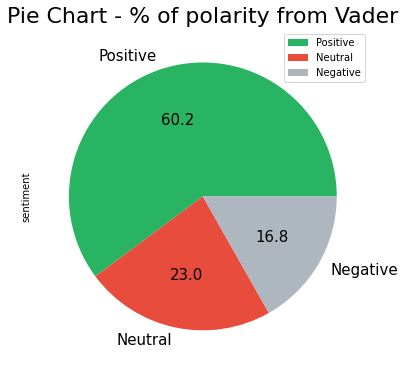

In [29]:
colors = ['#28B463', '#E74C3C', '#AEB6BF']
plt.title("Pie Chart - % of polarity from Vader", fontsize = 22)
tweets_corpus['sentiment'].value_counts().plot(kind='pie', autopct='%.1f', 
                                  figsize = [6,9], colors=colors, fontsize=15, legend=True)

# character length length of text in tweet

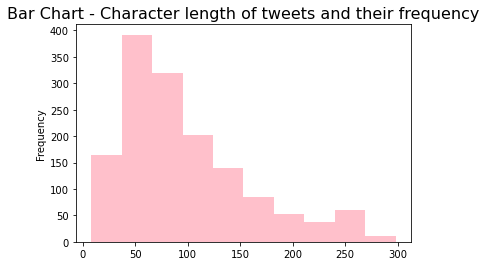

In [30]:
plt.title("Bar Chart - Character length of tweets and their frequency", fontsize = 16)
length_train = tweets_corpus['text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

# Most frequently occuring words in the tweets

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

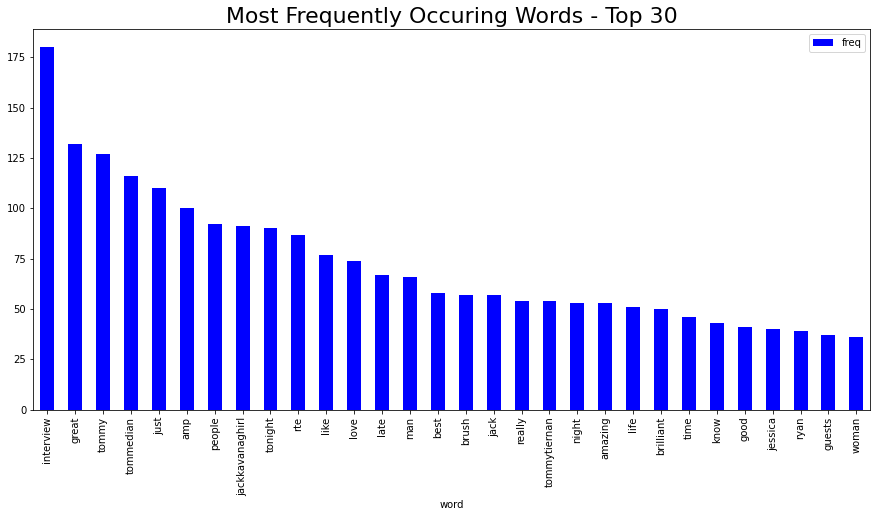

In [31]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(tweets_corpus.text)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30", fontsize = 22)

# Wordcloud of the most frequently occuring tweets

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

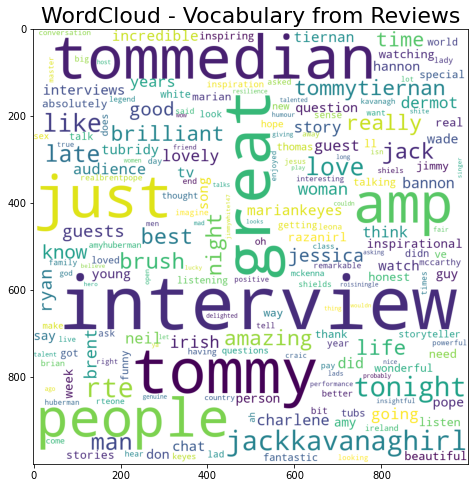

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

In [33]:
tweets_date = tweets_corpus.groupby(['created_at']).mean().reset_index()
tweets_date.head()

,created_at,favourite_count,retweet_count,compound,neg,neu,pos
0,2022-02-05 21:48:55+00:00,1.0,0.0,0.0000,0.000,1.000,0.000
1,2022-02-05 21:51:25+00:00,2.0,1.0,0.9712,0.000,0.606,0.394
2,2022-02-05 21:54:09+00:00,35.0,3.0,0.0000,0.000,1.000,0.000
3,2022-02-05 21:54:20+00:00,1.0,0.0,0.1531,0.000,0.652,0.348
4,2022-02-05 21:56:25+00:00,6.0,0.0,-0.8309,0.276,0.724,0.000


# Retweet v Favourite count with Polarity (bubble size)

In [35]:
import altair as alt
alt.Chart(data=tweets_corpus).mark_point().encode(
    x="favourite_count",
    y="retweet_count", 
    size='polarity' 
).properties(
    title='Retweet v Favourite count with Polarity(bubble size)'
)

alt.Chart(...)

In [38]:
df = pd.read_csv('AnnotatedTweetsWithVaderSentiment.csv', parse_dates=['created_at'], index_col='created_at')

In [39]:
df = df.drop('pos', 1)
df = df.drop('neg', 1)
df = df.drop('neu', 1)
df = df.drop('compound', 1)
df = df.drop('Unnamed: 0', 1)

# Dates corresponding number of favourites and retweets 

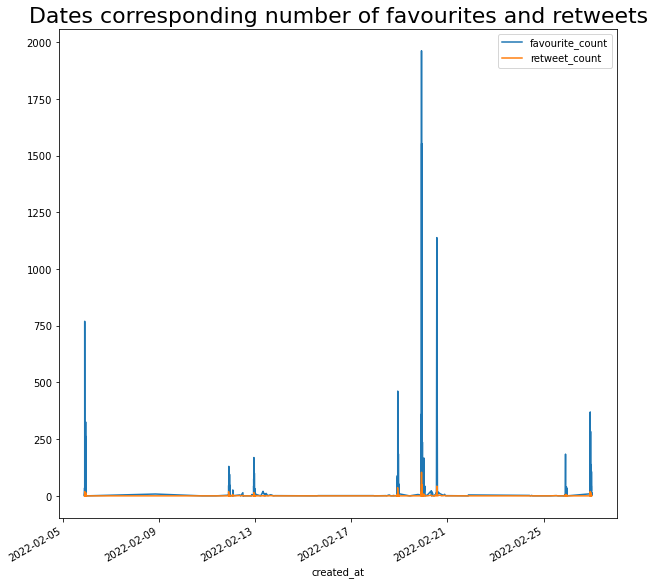

In [43]:
df.plot(figsize=(10,10))
plt.title("Dates corresponding number of favourites and retweets", fontsize = 22)
plt.show()